In [1]:
import numpy as np 
import pandas as pd 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs

import nltk
import requests

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iphone_reviews =[]

In [5]:
for i in range (1,31):
    op=[]
    url= "https://www.amazon.in/New-Apple-iPhone-12-64GB/product-reviews/B08L5WHFT9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_reviews = iphone_reviews+op

In [9]:
iphone_reviews = list(set(iphone_reviews))

In [12]:
 text = ' '.join(iphone_reviews)

## Data Cleaning

In [26]:
import re

text = re.sub("[^A-Za-z" "]+"," ",text).lower() #remove special character
text = re.sub("[0-9" "]+"," ",text).lower() #remove numbers
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text).lower() #remove hyperlink
    

In [27]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
txt_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

In [30]:
tokens_without_sw = [word for word in txt_tokens if not word in stopwords.words()]

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf = TfidfVectorizer()
text_Tf = Tf.fit_transform(tokens_without_sw)

In [32]:
feature_names = Tf.get_feature_names()
dense = text_Tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [33]:
df

,able,accessories,accurate,adapter,additional,ahead,alive,allow,almost,already,...,worst,worthy,would,writing,wrong,year,years,yes,youtube,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
word_list = ' '.join(df)

In [35]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

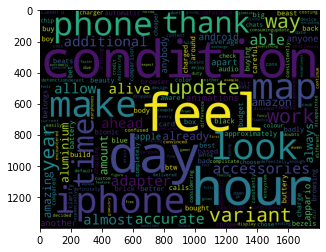

In [36]:
plt.imshow(wordcloud)

## Sentiment Analysis

In [42]:
with open('positive-words.txt',"r",encoding='latin1') as pos:
    pos_words = pos.read().split("\n")

In [43]:
pos_words = pos_words[35:]

In [46]:
text_pos_in_pos = ' '.join([word for word in df if word in pos_words])

In [47]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(text_pos_in_pos)

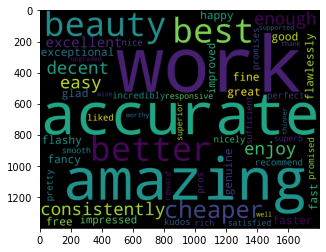

In [48]:
plt.imshow(wordcloud_pos)

In [44]:
with open('negative-words.txt',"r",encoding='latin1') as neg:
    neg_words = neg.read().split("\n")

In [45]:
neg_words = neg_words[35:]

In [49]:
text_neg_in_neg = ' '.join([word for word in df if word in neg_words])

In [50]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(text_neg_in_neg)

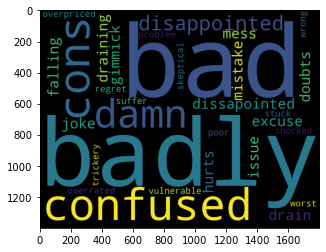

In [52]:
plt.imshow(wordcloud_neg)

In [53]:
len(df)

971

In [54]:
len(text_pos_in_pos)

414

In [55]:
len(text_neg_in_neg)

233

In [56]:
414/971

0.42636457260556127

In [57]:
233/971

0.2399588053553038